Gerekli tüm kütüphanleri indiriyoruz.

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime 

In [227]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)
pd.set_option('display.width', 500)


Veri setini "read_csv" komutu ile okutuyoruz.

In [ ]:
df = pd.read_csv("/content/NetflixOriginals_First.csv", encoding='ISO-8859-1')
df.head()

,Title,Genre,Premiere,Runtime,IMDB Score,Language
0,Enter the Anime,Documentary,"August 5, 2019",58,2.5,English/Japanese
1,Dark Forces,Thriller,"August 21, 2020",81,2.6,Spanish
2,The App,Science fiction/Drama,"December 26, 2019",79,2.6,Italian
3,The Open House,Horror thriller,"January 19, 2018",94,3.2,English
4,Kaali Khuhi,Mystery,"October 30, 2020",90,3.4,Hindi


1 ) Veri setine göre uzun soluklu filmler hangi dilde oluşturulmuştur? Görselleştirme yapınız.

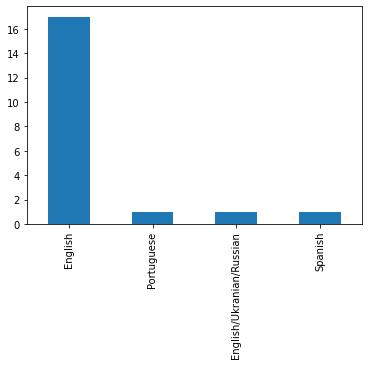

In [226]:
long_run = df[(df["Runtime"] > 60)].head(20)  #60 dk ve üzeri filmleri uzun soluklu olarak sınıflandırdım.
long_run["Language"].value_counts().plot(kind = "bar")
plt.show()

2) 2019 Ocak ile 2020 Haziran tarihleri arasında 'Documentary' türünde çekilmiş filmlerin IMDB değerlerini bulup görselleştiriniz.

In [ ]:
df["Date"] = pd.to_datetime(df["Premiere"])
df["Date"]

0     2019-08-05
1     2020-08-21
2     2019-12-26
3     2018-01-19
4     2020-10-30
         ...    
579   2018-12-31
580   2015-10-09
581   2018-12-16
582   2020-12-08
583   2020-10-04
Name: Date, Length: 584, dtype: datetime64[ns]

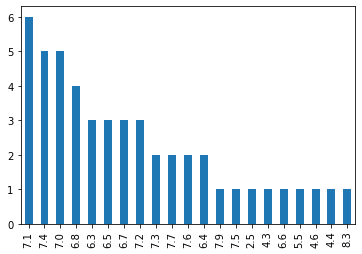

In [ ]:
filter1 = (df["Date"] >"2019-1-1") & (df["Date"] < "2020-6-1") & (df["Genre"] == "Documentary")
Doc_movies = df[filter1]
Doc_movies.head()

Doc_movies["IMDB Score"].value_counts().plot(kind = "bar")

3) İngilizce çekilen filmler içerisinde hangi tür en yüksek IMDB puanına sahiptir?

In [ ]:
from numpy.ma.core import sort
df = df.sort_values(["IMDB Score"], ascending=False)
df.loc[(df["Language"] == "English")].head(1)

,Title,Genre,Premiere,Runtime,IMDB Score,Language,Date
583,David Attenborough: A Life on Our Planet,Documentary,"October 4, 2020",83,9.0,English,2020-10-04


4) 'Hindi' Dilinde çekilmiş olan filmlerin ortalama 'runtime' suresi nedir?

In [ ]:
Hindi = df.loc[(df["Language"] == "Hindi")]
Hindi["Runtime"].mean()

115.78787878787878

5) 'Genre' Sütunu kaç kategoriye sahiptir ve bu kategoriler nelerdir? Görselleştirerek ifade ediniz.

In [ ]:
df["Genre"].value_counts().count()

115

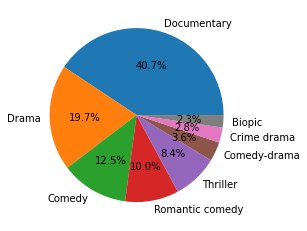

In [ ]:
data = df["Genre"].value_counts().head(8)
plt.pie(df["Genre"].value_counts().head(8), labels=data.index ,autopct='%1.1f%%');
plt.show()

6) Veri setinde bulunan filmlerde en çok kullanılan 3 dili bulunuz.

In [ ]:
df["Language"].value_counts().head(3)

English    401
Hindi       33
Spanish     31
Name: Language, dtype: int64

7) IMDB puanı en yüksek olan ilk 10 film hangileridir?

In [ ]:
df.sort_values(["IMDB Score"], ascending=False).head(10)

,Title,Genre,Premiere,Runtime,IMDB Score,Language,Date
583,David Attenborough: A Life on Our Planet,Documentary,"October 4, 2020",83,9.0,English,2020-10-04
582,Emicida: AmarElo - It's All For Yesterday,Documentary,"December 8, 2020",89,8.6,Portuguese,2020-12-08
581,Springsteen on Broadway,One-man show,"December 16, 2018",153,8.5,English,2018-12-16
580,Winter on Fire: Ukraine's Fight for Freedom,Documentary,"October 9, 2015",91,8.4,English/Ukranian/Russian,2015-10-09
579,Taylor Swift: Reputation Stadium Tour,Concert Film,"December 31, 2018",125,8.4,English,2018-12-31
578,Ben Platt: Live from Radio City Music Hall,Concert Film,"May 20, 2020",85,8.4,English,2020-05-20
577,Dancing with the Birds,Documentary,"October 23, 2019",51,8.3,English,2019-10-23
576,Cuba and the Cameraman,Documentary,"November 24, 2017",114,8.3,English,2017-11-24
575,The Three Deaths of Marisela Escobedo,Documentary,"October 14, 2020",109,8.2,Spanish,2020-10-14
574,Seaspiracy,Documentary,"March 24, 2021",89,8.2,English,2021-03-24


8) IMDB puanı ile 'Runtime' arasında nasıl bir korelasyon vardır? İnceleyip görselleştiriniz.

In [ ]:
df["IMDB Score"].dtype

dtype('float64')

In [ ]:
df["Runtime"].dtype

dtype('int64')

In [ ]:
cor_mat = df[["IMDB Score", "Runtime"]].corr()
cor_mat

,IMDB Score,Runtime
IMDB Score,1.000000,-0.040896
Runtime,-0.040896,1.000000


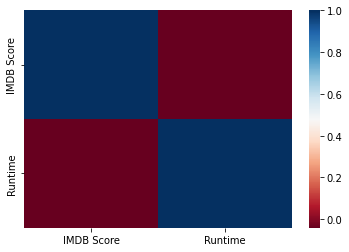

In [ ]:
sns.heatmap(cor_mat, cmap = "RdBu") 
plt.show()

Negatif yönde korelasyon vardır.

9) IMDB Puanı en yüksek olan ilk 10 'Genre' hangileridir? Görselleştiriniz.

In [ ]:
best_IMDB = df.groupby("Genre").agg({"IMDB Score": "mean"}).sort_values("IMDB Score", ascending=False).head(10)


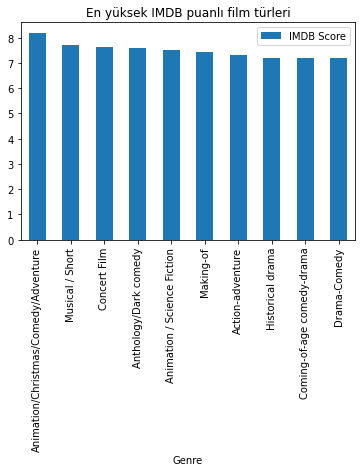

In [ ]:
best_IMDB.plot(kind = "bar")
plt.title("En yüksek IMDB puanlı film türleri")
plt.show()

10) 'Runtime' değeri en yüksek olan ilk 10 film hangileridir? Görselleştiriniz.

In [ ]:
df.sort_values(["Runtime"], ascending=False).head(10)

,Title,Genre,Premiere,Runtime,IMDB Score,Language,Date
561,The Irishman,Crime drama,"November 27, 2019",209,7.8,English,2019-11-27
328,Da 5 Bloods,War drama,"June 12, 2020",155,6.5,English,2020-06-12
581,Springsteen on Broadway,One-man show,"December 16, 2018",153,8.5,English,2018-12-16
284,The Forest of Love,Drama,"October 11, 2019",151,6.3,Japanese,2019-10-11
247,Citation,Drama,"November 6, 2020",151,6.2,English,2020-11-06
7,The Last Days of American Crime,Heist film/Thriller,"June 5, 2020",149,3.7,English,2020-06-05
509,Raat Akeli Hai,Thriller,"July 31, 2020",149,7.3,Hindi,2020-07-31
543,Ludo,Anthology/Dark comedy,"November 12, 2020",149,7.6,Hindi,2020-11-12
194,Army of the Dead,Zombie/Heist,"May 21, 2021",148,5.9,English,2021-05-21
5,Drive,Action,"November 1, 2019",147,3.5,Hindi,2019-11-01


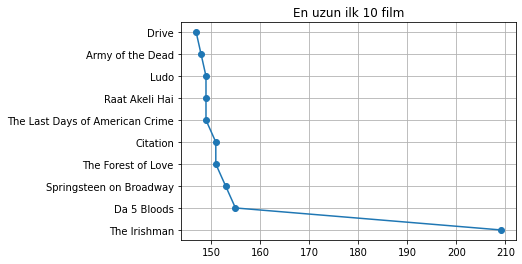

In [ ]:
df_Runtime = df.sort_values(["Runtime"], ascending=False).head(10)
plt.plot(df_Runtime["Runtime"], df_Runtime["Title"], marker = "o")
plt.title("En uzun ilk 10 film")
plt.grid()
plt.show()

11) Hangi yılda en fazla film yayımlanmıştır? Görselleştiriniz.

In [ ]:
df["Year"] = df["Date"].dt.year

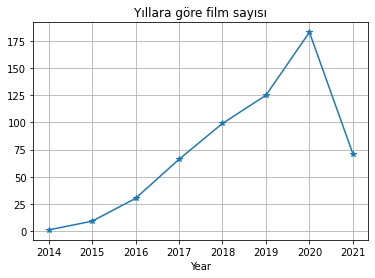

In [ ]:
df_year = df.groupby("Year").agg("Title").count().plot(kind = "line", marker = "*")
plt.title("Yıllara göre film sayısı")
plt.grid()
plt.show()

12) Hangi dilde yayımlanan filmler en düşük ortalama IMBD puanına sahiptir? Görselleştiriniz.

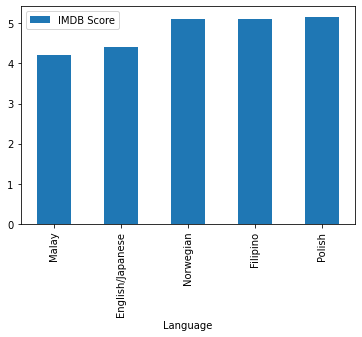

In [ ]:
lang_groups = df.groupby("Language").agg({"IMDB Score": "mean"}).sort_values("IMDB Score").head()
lang_groups.plot(kind = "bar")
plt.show()

13) Hangi yılın toplam "runtime" süresi en fazladır?

In [ ]:
df.groupby("Year").agg({"Runtime": "sum"}).sort_values("Runtime", ascending = False)

,Runtime
Year,
2020,17384
2019,10856
2018,9405
2021,7214
2017,6129
2016,2766
2015,814
2014,81


14) Her bir dilin en fazla kullanıldığı "Genre" nedir?

In [ ]:
df.groupby("Language")["Genre"].value_counts()

Language      Genre          
Bengali       Documentary          1
Dutch         Crime drama          1
              Fantasy              1
              Romantic comedy      1
English       Documentary        120
                                ... 
Thai          Horror               1
Thia/English  Documentary          1
Turkish       Comedy               2
              Drama                2
              Romance              1
Name: Genre, Length: 204, dtype: int64

15) Veri setinde outlier veri var mıdır? Açıklayınız.

In [ ]:
!pip install missingno
import missingno as msno
from datetime import date
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import LocalOutlierFactor
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, StandardScaler, RobustScaler

In [228]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 584 entries, 583 to 0
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Title       584 non-null    object        
 1   Genre       584 non-null    object        
 2   Premiere    584 non-null    object        
 3   Runtime     584 non-null    int64         
 4   IMDB Score  584 non-null    float64       
 5   Language    584 non-null    object        
 6   Date        584 non-null    datetime64[ns]
 7   Year        584 non-null    int64         
dtypes: datetime64[ns](1), float64(1), int64(2), object(4)
memory usage: 57.2+ KB


Bu veri setinde "Runtime" ve "IMDB Score" değerleri numerik veridir. "Year" değişkeni 'int64' tipinde görülmesine rağmen aslında tarih değişkenidir. Bu değerler için aykırı değer var mıdır?

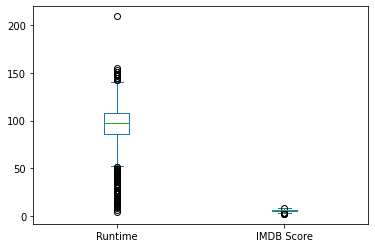

In [230]:
num_cols = ["Runtime", "IMDB Score"]
df[num_cols].plot(kind = "box")

'Runtime' değişkeni için outlier değerler vardır. IMDB Score değerinde de olabilir ama bu grafikten anlaması zordur. Başka bir yöntem deneyeceğiz.

In [231]:
def outlier_thresholds(dataframe, col_name, q1=0.25, q3=0.75):
    quartile1 = dataframe[col_name].quantile(q1)
    quartile3 = dataframe[col_name].quantile(q3)
    IQR = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * IQR
    low_limit = quartile1 - 1.5 * IQR
    print(f"{col_name} low_ limit: {low_limit}")
    print(f"{col_name} up_ limit: {up_limit}")
    return low_limit, up_limit

In [250]:
outlier_thresholds(df, "Runtime")
outlier_thresholds(df, "IMDB Score")

Runtime low_ limit: 53.0
Runtime up_ limit: 141.0
IMDB Score low_ limit: 3.7500000000000004
IMDB Score up_ limit: 8.95


(3.7500000000000004, 8.95)

Aykırı değer olup olmadığını görmek için:

In [258]:
def check_outlier(dataframe, col_name):
    low_limit, up_limit = outlier_thresholds(dataframe, col_name)
    if dataframe[(dataframe[col_name] > up_limit) | (dataframe[col_name] < low_limit)].any(axis = None):
        print(dataframe[(dataframe[col_name] > up_limit) | (dataframe[col_name] < low_limit)])
    else:
        False

In [259]:
check_outlier(df, "Runtime")

Runtime low_ limit: 53.0
Runtime up_ limit: 141.0
                                                 Title                         Genre            Premiere  Runtime  IMDB Score          Language       Date  Year
581                            Springsteen on Broadway                  One-man show   December 16, 2018      153       8.500           English 2018-12-16  2018
577                             Dancing with the Birds                   Documentary    October 23, 2019       51       8.300           English 2019-10-23  2019
561                                       The Irishman                   Crime drama   November 27, 2019      209       7.800           English 2019-11-27  2019
560                     If Anything Happens I Love You             Animation / Short   November 20, 2020       12       7.800           English 2020-11-20  2020
552                                              Anima               Musical / Short       June 27, 2019       15       7.700           English 2

In [238]:
check_outlier(df, "IMDB Score")

IMDB Score low_ limit: 3.7500000000000004
IMDB Score up_ limit: 8.95
                                        Title                  Genre           Premiere  Runtime  IMDB Score          Language       Date  Year
583  David Attenborough: A Life on Our Planet            Documentary    October 4, 2020       83       9.000           English 2020-10-04  2020
7             The Last Days of American Crime    Heist film/Thriller       June 5, 2020      149       3.700           English 2020-06-05  2020
6                           Leyla Everlasting                 Comedy   December 4, 2020      112       3.700           Turkish 2020-12-04  2020
5                                       Drive                 Action   November 1, 2019      147       3.500             Hindi 2019-11-01  2019
4                                 Kaali Khuhi                Mystery   October 30, 2020       90       3.400             Hindi 2020-10-30  2020
3                              The Open House        Horror thrille